![Reminder to Save](https://github.com/jamcoders/jamcoders-public-2025/blob/main/images/warning.png?raw=true)

In [ ]:
# Always run this code.
%config InteractiveShell.ast_node_interactivity="none"
import sys
if 'google.colab' in sys.modules:
  !pip install --force-reinstall git+https://github.com/jamcoders/jamcoders-public-2025.git --quiet
  !pip install networkx --quiet
from jamcoders.base_utils import *
import networkx as nx
from jamcoders.week3.labgraphb import *

  Preparing metadata (setup.py) ... done


# Week 3 Day 4A, Graph Search


## Question 1: Depth-First Search

We've learned some important concepts on graphs, such as neighbors and paths.
Another important concept is to check whether there is a path of *any length* from vertex `a` to vertex `b`
(if that is the case, we say that vertices `a` and `b` are *connected*).
One algorithm that can be used to test whether two vertices are connected if the Depth-First Search (DFS).

In a previous exercise, we figured out how to test if for two vertices there exists a path of length at most `2` connecting them. Let's figure out how to test if two vertices had a path of length `3`. From there, we will test if two vertices have a path of arbitrary length.

### 1.1 Warmup

First let's warm up by looking at the graph below and figuring out by hand whether two nodes are connected. Run the code below to generate and draw the graph:

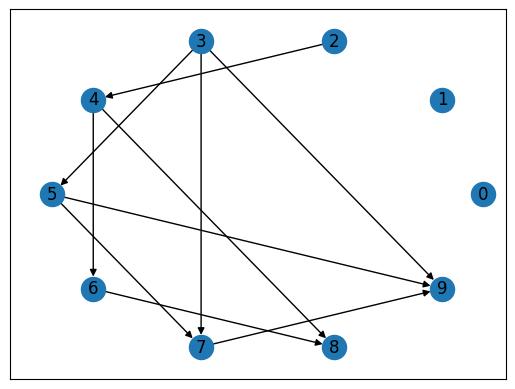

In [ ]:
# Graph: (don't change this code)
G = nx.DiGraph()
n = 10
G.add_nodes_from(range(n))
edges = []
for i in range(n - 1):
    for j in range(i + 1, n):
        if j <= i ** 2 and j % 2 == i % 2:
            edges.append((i, j))
G.add_edges_from(edges)
pos = nx.circular_layout(G)
nx.draw_networkx(G, with_labels=True, pos=pos)


Now `connected_X_Y` should be `True` if `X` is connected to `Y`, and `False` otherwise. Fill in the answers:

In [ ]:
connected_1_4 = ...
connected_7_3 = ...
connected_3_7 = ...
connected_2_8 = ...
connected_4_6 = ...
connected_2_6 = ...
connected_8_1 = ...

check_answer_1_0([connected_1_4, connected_7_3,connected_3_7,connected_2_8,connected_4_6,connected_2_6,connected_8_1])

### 1.2 path_3()
It would be nice to get a code to do all this checking for us! Before we write that, let's first figure out how to test if two vertices have a path of length `3` connecting them.

You are given a **directed** graph `G` and two nodes `n1` and `n2`. The graph is represented as an **adjacency list**. Check if there is an path of **exactly** length `3`  that starts from `n1` and ends at `n2`.

For example in the graph above, `2 -> 4 -> 6 -> 8` is a path of length `3`, so `path_3(G, 2, 8)` should return `True`. Even though there is a path of length `1` from `7` to `9`, there is not one of length `3`, so `path_3(G, 7, 9)` should return `False`. There is no path from `1` to `3`, so `path_3(G, 1, 3)` should return `False`.

Note that the following _get_neighbors()_ and _is_neighboring()_ functions are different than the ones from [Notebook w3d3b](https://drive.google.com/file/d/1FNU0Zi0E5jNmCSN1axLZKsQYh53NR-DZ/view?usp=drive_link), as this concerns a different representation of the graph.

In [ ]:
def get_neighbors(G, n):
    """ returns the list of neighbors of node n in graph G
    Inputs:
        G: The graph
            type: list[list[int]]
        n: The node
            type: int
    Returns: The list of neighbors
            type: list[int]
    """
    # YOUR CODE HERE

def is_neighboring(G, n1, n2):
    """ returns True if there is an edge from n1 to n2 in G
    Inputs:
        G: The graph
            type: list[list[int]]
        n1: A node
            type: int
        n2: Another node
            type: int
    Returns:
            type: bool
    """
    # YOUR CODE HERE

Now fill in the function `path_3`:

In [ ]:
def path_3(G, n1, n2):
    """ returns True if there is a path of exactly length 3 from n1 to n2 in G
    Inputs:
        G: The graph
            type: list[list[int]]
        n1: A node
            type: int
        n2: Another node
            type: int
    Returns:
            type: bool
    """
    # YOUR CODE HERE

In [ ]:
# Test cases: DO NOT CHANGE ANY CODE IN THIS CELL
G = nx.DiGraph()
n = 10
G.add_nodes_from(range(n))
edges = []
for i in range(n - 1):
    for j in range(i + 1, n):
        if j <= i ** 2 and j % 2 == i % 2:
            edges.append((i, j))
G.add_edges_from(edges)
pos = nx.circular_layout(G)
nx.draw_networkx(G, with_labels=True, pos=pos)

graph = nx.to_dict_of_lists(G)
assert_equal(want=False, got=path_3(graph, 1, 4))
assert_equal(want=False, got=path_3(graph, 7, 3))
assert_equal(want=False, got=path_3(graph, 3, 7))
assert_equal(want=True, got=path_3(graph, 2, 8))
assert_equal(want=False, got=path_3(graph, 4, 6))
assert_equal(want=False, got=path_3(graph, 2, 6))
assert_equal(want=False, got=path_3(graph, 8, 1))

### 1.3 is_connected() with DFS

DFS is an algorithm that lets us determine whether there is a path of *any length* between two nodes `n1` and `n2`. In general, DFS starts at `n1`, and recurses on the neighbors of `n1`, the neighbors of the neighbors of `n1`, etc.

Suppose we have a recursive function `dfs(v)`, which checks if there's a path from `n1 = 2` to `n2 = 8`. One possible recursive stack trace is the following, where each time we call `dfs(v)` on v's neighbor:

|        |        |        |        |
|--------|--------|--------|--------|
| `dfs(2)` |        |        |        |
| `--->`   | `dfs(4)` |        |        |
|        | `--->`   | `dfs(6)` |        |
|        |        | `--->`   | `dfs(8)` |

which indicates that node `8` is reachable from node `2`. We could also use DFS to find the shortest path from `n1 = 3` to `n2 = 9`. However, note that the following trace could occur

|        |        |        |        |
|--------|--------|--------|--------|
| `dfs(3)` |        |        |        |
| `--->` | `dfs(5)` |        |        |
|        | `--->`   | `dfs(7)` |        |
|        |        | `--->`   | `dfs(9)` |
|        |        | `dfs(9)` |        |
|        | `dfs(7)` |        |        |
|        | `--->`   | `dfs(9)` |        |

where we visit nodes 7 and 9 multiple times. This is inefficient, and could result in infinite recursion if a cycle exists in the graph. We overcome this by keeping track of which vertices have been visited already in the list `visited`, so we don't visit them again.

Fill in the code in the `dfs` helper function below, used in the function `is_connected()` to check for a path from node `n1` to node `n2` in directed graph `G`.

In [ ]:
def is_connected_dfs(G, n1, n2):
    """ Searchs for a path between n1 and n2 in G using depth first search
    returns True if there is a path, otherwise returns False

    Inputs:
        G: The graph
            type: list[list[int]]
        n1: A node
            type: int
        n2: Another node
            type: int
    Returns:
            type: bool
    """
    visited = [False] * len(G) # visited[i] is True if vertex i has been visited
    return dfs(n1, n2, G, visited)

def dfs(u, t, G, visited):
    """
    Helper function for is_connected_dfs.

    Inputs:
        u: A node
            type: int
        t: A node
            type: int
        G: The graph
            type: list[list[int]]
        visited: A list indicating which nodes have been visited.
    Returns:
        Whether there is a path between u and t.
        type: bool
    """
    # YOUR CODE HERE


Run the cell below to test your implementation.

In [ ]:
# Graph:
G = nx.DiGraph()
n = 10
G.add_nodes_from(range(n))
edges = []
for i in range(n - 1):
    for j in range(i + 1, n):
        if j <= i ** 2 and j % 2 == i % 2:
            edges.append((i, j))
G.add_edges_from(edges)
pos = nx.circular_layout(G)
nx.draw_networkx(G, with_labels=True, pos=pos)
graph = nx.to_dict_of_lists(G)

assert_equal(want=False, got=is_connected_dfs(graph, 1, 4))
assert_equal(want=False, got=is_connected_dfs(graph, 7, 3))
assert_equal(want=True, got=is_connected_dfs(graph, 3, 7))
assert_equal(want=True, got=is_connected_dfs(graph, 2, 8))
assert_equal(want=True, got=is_connected_dfs(graph, 4, 6))
assert_equal(want=True, got=is_connected_dfs(graph, 2, 6))
assert_equal(want=False, got=is_connected_dfs(graph, 8, 1))


## Question 2: Word Questions

How many edges are there in a **fully connected** graph with `n` nodes? That is, if you have `n` nodes, what is the maximum number of unique edges between two distinct nodes you can have?

In [ ]:
# write your answer in terms of n here:

# answer checking: if n=337, what is the maximum number of unique edges? feel free to use a calculator
max_unique_edges = ...
check_answer_2_1(max_unique_edges)

What if the graph is **directed**? Then what is the maximum number of edges?

In [ ]:
# write your answer in terms of n here:

# answer checking: if n=337, what is the maximum number of unique edges in the directed graph? feel free to use a calculator
max_unique_edges_directed = ...
check_answer_2_2(max_unique_edges_directed)

Why might you be able to think of an undirected graph as a special case of a directed graph?

In [ ]:
# Answer here:

# 3. Breadth-First Search

Breadth-First Search (BFS) is a second algorithm that can also determine whether there exists a path between two nodes `n1` and `n2`. When iterating over vertices, BFS will first touch all of the nodes with path length `1` from `n1` (i.e. `n1`'s neighbors), followed by all nodes with path length `2`, followed by path length `3`, and so on.

To achieve this, BFS uses a queue. BFS first enqueues the starting vertex `n1`. It then, until the queue is empty, repeatedly takes a node off the queue with `dequeue`, marks the node as visited, and adds all of that node's unvisited neighbors to the queue.

Suppose we wanted to run a BFS starting from node `2`. The queue at each iteration would look like the following

| Step | Queue    | Notes                                          |
|------|----------|------------------------------------------------|
| 0    | `[2]`    | Enqueue starting node                          |
| 1    | `[4]`    | Dequeue 2, enqueue 2's neighbors               |
| 2    | `[6, 8]` | Dequeue 4, enqueue 4's neighbors               |
| 3    | `[8]`    | Dequeue 6, enqueue 6's **unvisited** neighbors |
| 4    | `[]`     | Dequeue 8, enqueue 8's neighbors               |
| 5    |          | BFS terminates                                 |

### Implementation of Queues

Do not change any code here, but try to understand the different functions that a queue does

In [ ]:
# Do not change this code, just read through
def init_q(lst=None):
    """Constructs a new empty queue.

    Arguments: Optional list of initial elements in the queue (Optional[list]).
    Returns (Queue): The new empty queue.
    Effects: None.
    """
    if lst is None:
        return []
    return lst[:]


def enqueue_q(queue, elem):
    """Adds an element to the rear of the queue.

    Arguments:
        queue (Queue): The queue to which the element should be added.
        elem (Any): The element to be added to the queue.
    Returns: None.
    Effects: Modifies `queue` by adding the new element.
    """
    queue.append(elem)


def dequeue_q(queue):
    """Removes the element from the front of the queue and returns it.

    queue must not be empty.

    Arguments:
        queue (Queue): The queue from which the front element should be removed.
    Returns (any): The front element in the queue.
    Effects: The front element is removed from the queue.
    """
    return queue.pop(0)


def peek_q(queue):
    """Returns the element at the front of the queue, without removing it.

    queue must not be empty.

    Arguments:
        queue (Queue): The queue from which the front element should be returned.
    Returns (any): The front element in the queue.
    Effects: None
    """
    return queue[0]


def is_empty_q(queue):
    """Determines whether or not the queue is empty.

    Arguments:
        queue (Queue):  The queue to be checked if it is empty or not
    Returns (bool): True if the queue is empty or False if it is not empty
    Effects: None
    """
    return len(queue) == 0

Now its time for you to implement BFS. You should be using these functions in your solution
* `enqueue_q`
* `dequeue_q`
* `is_empty_q`
* `get_neighbors`


#### Pseudocode
* add the starting node `n1` to the queue and mark it visited
* while there are still items in the queue
    * take out the first node, `n` of the queue
    * loop over all `n`'s neighbors
        * if the neighbor has not yet been visited
            * add it to the queue
            * mark it visited
* return a boolean about whether `n2` has already been visited

In [ ]:
def is_connected_bfs(G, n1, n2):
    """ returns True if there is a path from n1 to n2 in G
    Inputs:
        G: The graph
            type: list[list[int]]
        n1: A node
            type: int
        n2: Another node
            type: int
    Returns:
            type: bool
    """
    visited = [False] * len(G) # visited[i] is True if vertex i has been visited
    queue = init_q()

    # Write your code here



In [ ]:
# Test cases: (do not change this code!)
G = nx.DiGraph()
n = 10
G.add_nodes_from(range(n))
edges = []
for i in range(n - 1):
    for j in range(i + 1, n):
        if j <= i ** 2 and j % 2 == i % 2:
            edges.append((i, j))
G.add_edges_from(edges)
pos = nx.circular_layout(G)
nx.draw_networkx(G,pos=pos, arrows=True, arrowsize=1, with_labels=True)
graph = nx.to_dict_of_lists(G)

assert_equal(want=False, got=is_connected_bfs(graph, 1, 4))
assert_equal(want=False, got=is_connected_bfs(graph, 7, 3))
assert_equal(want=True, got=is_connected_bfs(graph, 3, 7))
assert_equal(want=True, got=is_connected_bfs(graph, 2, 8))
assert_equal(want=True, got=is_connected_bfs(graph, 4, 6))
assert_equal(want=True, got=is_connected_bfs(graph, 2, 6))
assert_equal(want=False, got=is_connected_bfs(graph, 8, 1))

# 🤓🤓🤓🤓

### Congrats on finishing the notebook! You're doing awesome